In [1]:
!pwd

/Users/fredrick/Desktop


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('RFM_test_oribs.csv')
df.head()

,user,purchase_time,value
0,0poa0a8mcm21lijd,2021-10-07T03:28:09Z,2730.0
1,s3uy2pnsh4prfg7p,2021-10-07T02:49:26Z,5570.0
2,hjbn8f29e1g0upb9,2021-10-07T04:28:51Z,3370.0
3,2eqmiqomq3w3skxj,2021-10-07T01:02:33Z,3060.0
4,dhshq39etnv37c3o,2021-10-07T04:50:55Z,3907.0


In [4]:
# df_recency = df.groupby(by='Customer Name',
#                         as_index=False)['Order Date'].max()
# df_recency.columns = ['CustomerName', 'LastPurchaseDate']
# recent_date = df_recency['LastPurchaseDate'].max()
# df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
#     lambda x: (recent_date - x).days)
# df_recency.head()

In [3]:
df_pt = df.groupby('user').agg({'purchase_time':'max'})
df_pt.loc['qw2jjinnn1hgepsi']

purchase_time    2021-12-21T14:07:06Z
Name: qw2jjinnn1hgepsi, dtype: object

In [4]:
df_pt.head()

,purchase_time
user,
003ybs8e6rjf1lgi,2021-12-11T09:35:41Z
0040n2alngldt52d,2021-10-18T15:30:45Z
004vigr8e27mu4bv,2021-10-12T01:34:13Z
006a6rql3g1f5ok9,2021-11-25T14:09:30Z
006ia2ybbt36l8vq,2021-11-01T13:21:41Z


In [5]:
df_pt = df_pt.reset_index()
df_pt.head()

,user,purchase_time
0,003ybs8e6rjf1lgi,2021-12-11T09:35:41Z
1,0040n2alngldt52d,2021-10-18T15:30:45Z
2,004vigr8e27mu4bv,2021-10-12T01:34:13Z
3,006a6rql3g1f5ok9,2021-11-25T14:09:30Z
4,006ia2ybbt36l8vq,2021-11-01T13:21:41Z


In [6]:
df_pt.columns = ['user', 'LastPurchaseDate']
df_pt.head()

,user,LastPurchaseDate
0,003ybs8e6rjf1lgi,2021-12-11T09:35:41Z
1,0040n2alngldt52d,2021-10-18T15:30:45Z
2,004vigr8e27mu4bv,2021-10-12T01:34:13Z
3,006a6rql3g1f5ok9,2021-11-25T14:09:30Z
4,006ia2ybbt36l8vq,2021-11-01T13:21:41Z


In [7]:
df_pt['LastPurchaseDate'] = df_pt['LastPurchaseDate'].astype('datetime64[ns]')

In [8]:
max_day = df_pt['LastPurchaseDate'].max()
max_day

Timestamp('2021-12-31 22:38:04')

In [9]:
# df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
#     lambda x: (recent_date - x).days)
df_pt['recency'] = df_pt['LastPurchaseDate'].apply(lambda x: (max_day - x).days)

In [10]:
df_pt.head()

,user,LastPurchaseDate,recency
0,003ybs8e6rjf1lgi,2021-12-11 09:35:41,20
1,0040n2alngldt52d,2021-10-18 15:30:45,74
2,004vigr8e27mu4bv,2021-10-12 01:34:13,80
3,006a6rql3g1f5ok9,2021-11-25 14:09:30,36
4,006ia2ybbt36l8vq,2021-11-01 13:21:41,60


In [11]:
df_freq = df.groupby('user', as_index=False).agg({'value':'count'})
df_freq.columns = ['user', 'frequency']
df_freq.head()

,user,frequency
0,003ybs8e6rjf1lgi,1
1,0040n2alngldt52d,1
2,004vigr8e27mu4bv,1
3,006a6rql3g1f5ok9,1
4,006ia2ybbt36l8vq,2


In [12]:
df_value = df.groupby('user', as_index=False).agg({'value':'sum'})
df_value.columns = ['user', 'monetary']
df_value.head()

,user,monetary
0,003ybs8e6rjf1lgi,2030.0
1,0040n2alngldt52d,390.0
2,004vigr8e27mu4bv,720.0
3,006a6rql3g1f5ok9,740.0
4,006ia2ybbt36l8vq,3610.0


In [13]:
df_rfm = df_pt.merge(df_freq, on='user', how='inner').merge(df_value, on='user', how='inner')\
              .drop('LastPurchaseDate', axis=1)
df_rfm

,user,recency,frequency,monetary
0,003ybs8e6rjf1lgi,20,1,2030.0
1,0040n2alngldt52d,74,1,390.0
2,004vigr8e27mu4bv,80,1,720.0
3,006a6rql3g1f5ok9,36,1,740.0
4,006ia2ybbt36l8vq,60,2,3610.0
...,...,...,...,...
14709,zyzboiucilbii7tl,50,1,450.0
14710,zzhgab6b0sydwu1p,40,1,1840.0
14711,zzncoskc1182af8e,35,1,370.0
14712,zztssvit74jehb9u,10,1,500.0


In [14]:
df_rfm['R_rank'] = df_rfm['recency'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['frequency'].rank(ascending=False)
df_rfm['M_rank'] = df_rfm['monetary'].rank(ascending=False)
df_rfm

,user,recency,frequency,monetary,R_rank,F_rank,M_rank
0,003ybs8e6rjf1lgi,20,1,2030.0,11715.0,7680.5,5027.5
1,0040n2alngldt52d,74,1,390.0,3142.0,7680.5,13556.5
2,004vigr8e27mu4bv,80,1,720.0,2246.0,7680.5,11090.5
3,006a6rql3g1f5ok9,36,1,740.0,9014.5,7680.5,10974.0
4,006ia2ybbt36l8vq,60,2,3610.0,5160.5,389.5,1379.5
...,...,...,...,...,...,...,...
14709,zyzboiucilbii7tl,50,1,450.0,7389.5,7680.5,12969.5
14710,zzhgab6b0sydwu1p,40,1,1840.0,8633.5,7680.5,6009.5
14711,zzncoskc1182af8e,35,1,370.0,9113.0,7680.5,13929.5
14712,zztssvit74jehb9u,10,1,500.0,13734.0,7680.5,12587.0


In [15]:
df_rfm['R_rank'].max()

14642.5

In [16]:
11715.0/14642.5*100

80.00682943486427

In [17]:
df_rfm['R_rank_nor'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_nor'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_nor'] = (df_rfm['M_rank']/df_rfm['M_rank'].max())*100

In [18]:
df_rfm = df_rfm.drop(['R_rank', 'F_rank', 'M_rank'], axis=1)

In [19]:
df_rfm

,user,recency,frequency,monetary,R_rank_nor,F_rank_nor,M_rank_nor
0,003ybs8e6rjf1lgi,20,1,2030.0,80.006829,100.000000,34.180916
1,0040n2alngldt52d,74,1,390.0,21.458084,100.000000,92.167794
2,004vigr8e27mu4bv,80,1,720.0,15.338911,100.000000,75.401978
3,006a6rql3g1f5ok9,36,1,740.0,61.563941,100.000000,74.609919
4,006ia2ybbt36l8vq,60,2,3610.0,35.243299,5.071284,9.378931
...,...,...,...,...,...,...,...
14709,zyzboiucilbii7tl,50,1,450.0,50.466109,100.000000,88.176905
14710,zzhgab6b0sydwu1p,40,1,1840.0,58.961926,100.000000,40.857327
14711,zzncoskc1182af8e,35,1,370.0,62.236640,100.000000,94.703743
14712,zztssvit74jehb9u,10,1,500.0,93.795458,100.000000,85.576367


In [20]:
df_rfm['RFM_score'] = df_rfm['R_rank_nor']*0.15 + df_rfm['F_rank_nor']*0.28 + df_rfm['M_rank_nor']*0.57
# df_rfm['RFM_score'] *= 0.05

In [21]:
df_rfm['RFM_score'].describe()

count    14714.000000
mean        62.872202
std         19.287555
min          0.559661
25%         48.411025
50%         62.878211
75%         79.001042
max         99.705576
Name: RFM_score, dtype: float64

In [22]:
high_value_user = df_rfm[df_rfm['RFM_score']>79]['user']
medium_value_user = df_rfm[(df_rfm['RFM_score']<=79)&(df_rfm['RFM_score']>48)]['user']
low_value_user = df_rfm[(df_rfm['RFM_score']<=48)]['user']

In [23]:
df_rfm.shape

(14714, 8)

In [24]:
3679/14714

0.2500339812423542

In [25]:
print(high_value_user.shape[0]/df_rfm.shape[0]*100)
print(medium_value_user.shape[0]/df_rfm.shape[0]*100)
print(low_value_user.shape[0]/df_rfm.shape[0]*100)
print(high_value_user.shape[0]+medium_value_user.shape[0]+low_value_user.shape[0])
print(df_rfm.shape[0])

25.00339812423542
50.85632730732635
24.140274568438223
14714
14714


In [26]:
conditions = [df_rfm['user'].isin(high_value_user),
              df_rfm['user'].isin(medium_value_user),
              df_rfm['user'].isin(low_value_user),]

In [27]:
import numpy as np

In [28]:
df_rfm['Group'] = np.select(conditions, ['High_Value', 'Medium_Value', 'Low_Value'], default=-1)

In [29]:
df_rfm['Group'].unique()

array(['Medium_Value', 'High_Value', 'Low_Value'], dtype=object)

In [30]:
df_rfm

,user,recency,frequency,monetary,R_rank_nor,F_rank_nor,M_rank_nor,RFM_score,Group
0,003ybs8e6rjf1lgi,20,1,2030.0,80.006829,100.000000,34.180916,59.484146,Medium_Value
1,0040n2alngldt52d,74,1,390.0,21.458084,100.000000,92.167794,83.754355,High_Value
2,004vigr8e27mu4bv,80,1,720.0,15.338911,100.000000,75.401978,73.279964,Medium_Value
3,006a6rql3g1f5ok9,36,1,740.0,61.563941,100.000000,74.609919,79.762245,High_Value
4,006ia2ybbt36l8vq,60,2,3610.0,35.243299,5.071284,9.378931,12.052445,Low_Value
...,...,...,...,...,...,...,...,...,...
14709,zyzboiucilbii7tl,50,1,450.0,50.466109,100.000000,88.176905,85.830752,High_Value
14710,zzhgab6b0sydwu1p,40,1,1840.0,58.961926,100.000000,40.857327,60.132966,Medium_Value
14711,zzncoskc1182af8e,35,1,370.0,62.236640,100.000000,94.703743,91.316629,High_Value
14712,zztssvit74jehb9u,10,1,500.0,93.795458,100.000000,85.576367,90.847848,High_Value


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

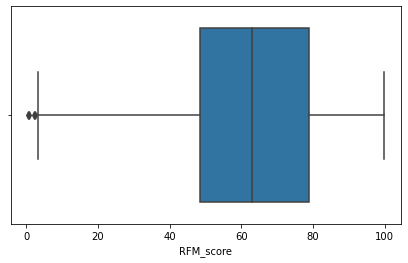

In [32]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df_rfm['RFM_score'])
plt.show()

In [33]:
user_pct = df_rfm.groupby('Group').agg({'user':'count'}).reset_index()
user_pct['pct'] = user_pct['user'].apply(lambda x: x/user_pct['user'].sum())

In [34]:
user_pct

,Group,user,pct
0,High_Value,3679,0.250034
1,Low_Value,3552,0.241403
2,Medium_Value,7483,0.508563


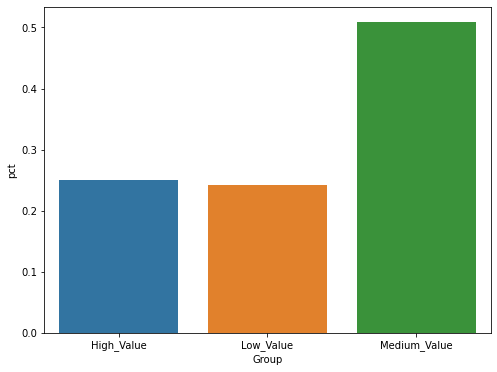

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x=user_pct['Group'], y=user_pct['pct'], data=user_pct)
plt.show()

In [39]:
print(df_rfm['monetary'].sum())
print(df_rfm[df_rfm['Group']=='High_Value']['monetary'].sum())

27779455.0
1862952.0


In [40]:
1862952 / 27779455 * 100

6.706222278298836

In [41]:
monetary_list = []
col_list = ['High_Value', 'Medium_Value', 'Low_Value']
for col in col_list:
    monetary_list.append(df_rfm[df_rfm['Group']==col]['monetary'].sum())

In [42]:
monetary_list

[1862952.0, 12129126.0, 13787377.0]

In [48]:
monetary_pct_list = list(monetary_list / df_rfm['monetary'].sum() * 100)
monetary_pct_list

[6.706222278298836, 43.66221727532091, 49.63156044638025]

In [61]:
pd.DataFrame([monetary_list, monetary_pct_list], columns=['High_Value', 'Medium_Value', 'Low_Value']).transpose()\
  .rename(columns={0:'monetary', 1:'pct'})

,monetary,pct
High_Value,1862952.00,6.71
Medium_Value,12129126.00,43.66
Low_Value,13787377.00,49.63


In [50]:
pd.set_option('display.float_format', lambda x: '%.2f'%x)

In [63]:
df_high = df_rfm[df_rfm['Group']=='High_Value']
df_high.head()

,user,recency,frequency,monetary,R_rank_nor,F_rank_nor,M_rank_nor,RFM_score,Group
1,0040n2alngldt52d,74,1,390.00,21.46,100.00,92.17,83.75,High_Value
3,006a6rql3g1f5ok9,36,1,740.00,61.56,100.00,74.61,79.76,High_Value
10,00m91mm1et151pgn,11,1,370.00,92.69,100.00,94.70,95.88,High_Value
13,00p2kjna7vlo8t3u,74,1,520.00,21.46,100.00,84.52,79.39,High_Value
15,010abbh9dc31mpdq,31,1,280.00,65.05,100.00,99.68,94.58,High_Value


In [65]:
df_high['monetary'].sum() / df_high['user'].nunique()

506.37455830388694

In [66]:
df_low = df_rfm[df_rfm['Group']=='Low_Value']
df_low['monetary'].sum() / df_low['user'].nunique()

3881.581362612613